In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection & Analysis

In [3]:
# loading data
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#statistocal measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 500x500 with 0 Axes>

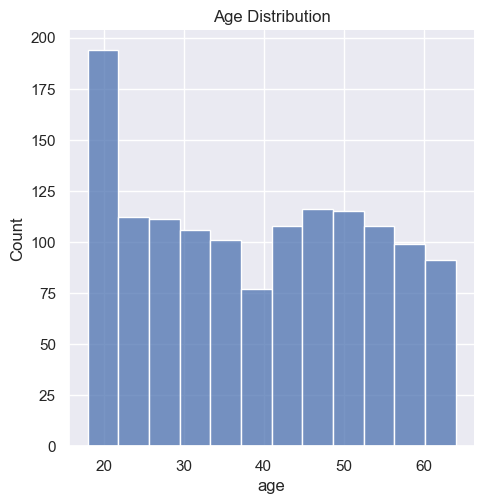

In [20]:
#distribution of age
#sns.set()
plt.figure(figsize=(5,5))
#sns.distplot(df['age'])
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

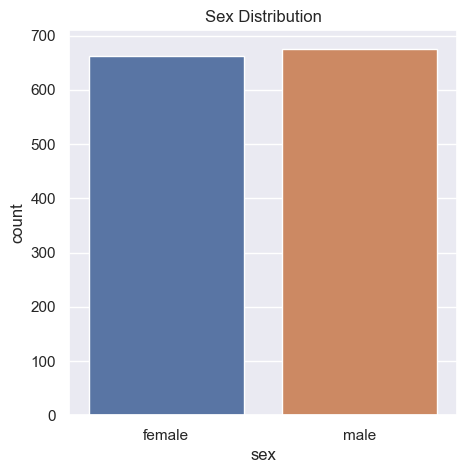

In [22]:
#distribution for categorical column - Gender

plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')

In [23]:
#count of female and male
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\SanthanaLakshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


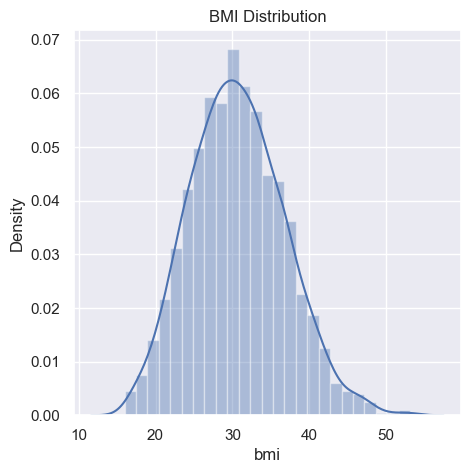

In [25]:
#distribution of bmi
#Normal BMI Range --> 18.5 to 24.9
#sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
#sns.displot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Text(0.5, 1.0, 'Children')

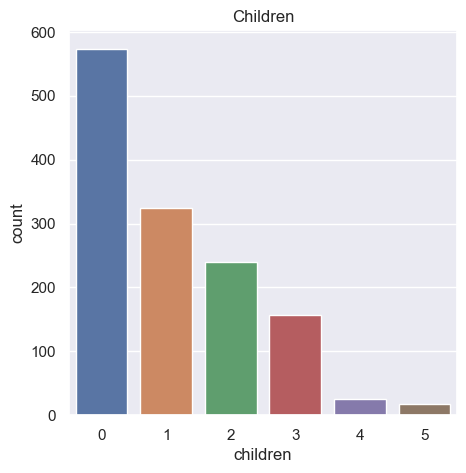

In [26]:
#distribution for categorical column - Children

plt.figure(figsize=(5,5))
sns.countplot(x='children', data=df)
plt.title('Children')

In [27]:
#counting Children
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Region Distribution')

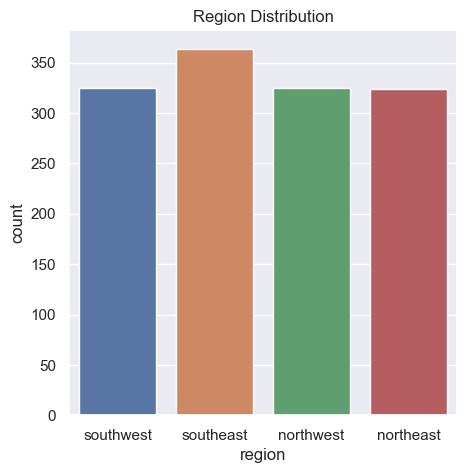

In [28]:
#distribution for categorical column - Region

plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')

In [29]:
#counting Children
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\SanthanaLakshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


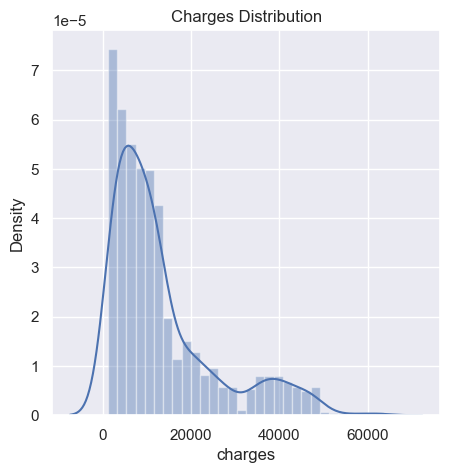

In [30]:
#distribution of charges
plt.figure(figsize=(5,5))
sns.distplot(df['charges'])
#sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing

### Convert Categorical to numerical values - sex, smoker, region

In [32]:
#Encoding the categorical features



In [33]:
#Encoding sex column
df.replace({'sex':{'male': 0, 'female':1}}, inplace=True)

In [34]:
#encoding smoker column
df.replace({'smoker':{'yes': 0, 'no': 1}},inplace=True)

In [35]:
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Split the features and target

In [37]:
X = df.drop(columns='charges',axis=1)
y = df.charges

In [38]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [40]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Splitting the data into Training and Testinmg Data

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## Model Selection

In [43]:
med_lr = LinearRegression()


In [44]:
med_lr.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

In [46]:
#prediction on training data
predict_train = med_lr.predict(X_train)

In [49]:
#performance metric - R squared value
Rsq_train = metrics.r2_score(y_train,predict_train)
print("R2 Score value for training data: ", Rsq_train)

R2 Score value for training data:  0.751505643411174


In [50]:
#prediction on test data
test_predict = med_lr.predict(X_test)

In [53]:
#R squared value for testing data
Rsq_test = metrics.r2_score(y_test,test_predict)
print("R2 Score value for testing data: ", Rsq_test)

R2 Score value for testing data:  0.7447273869684077


## Building predictive system

In [59]:
input_data =(37,0,29.83,2,1,2)

#changing tuple format input data into numpy array
input_to_array = np.asarray(input_data)

#reshape the array
input_to_array_reshaped = input_to_array.reshape(1,-1)

prediction = med_lr.predict(input_to_array_reshaped)
print("Insurance cost is in USD: ",prediction[0])

Insurance cost is in USD:  8179.731428794683


C:\Users\SanthanaLakshmi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
